<a href="https://colab.research.google.com/github/rahatarinasir/Time-series-prediction---RNN/blob/main/Time_series_prediction_RNN_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Initialization

In [ ]:
from collections import deque
import numpy as np 
import pandas as pd   
import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

## Dynamic finding

In [ ]:
def dynamic_finding(data, max_lag = None, th = 0.1, mode = 'unbiased'):
    N = len(data)
    if not max_lag:
        max_lag = N - 1
    autocorrelation_p = deque()
    for i in range(0, max_lag):
        X = data.shift(i).fillna(0)
        autocorrelation_p.append(np.dot(X.T, data)/N if mode == 'unbiased' else np.dot(X.T, data)/(N-i))
    t = np.arange(-max_lag, max_lag, 1)
    autocorrelation_p = np.array(autocorrelation_p).reshape(max_lag, 1)
    autocorrelation_n = autocorrelation_p[::-1]
    plt.plot(np.arange(0, max_lag, 1), autocorrelation_p, 'b.', linewidth=3)
    plt.plot(np.arange(-max_lag, 0, 1), autocorrelation_n,'b', linewidth=3)
    plt.plot(t, th*np.ones(len(t)), 'k--', linewidth=2)
    plt.plot(t, -th*np.ones(len(t)), 'k--', linewidth=2)
    plt.xlabel('k')
    plt.title('AutoCorrelation function')
    plt.axis([-max_lag, max_lag, -0.2, 0.75])
    plt.show()

## Sequence generation

In [ ]:
# One step ahead prediction 
# Five steps ahead predicition 


def sequence_making(sequence, n_step = 25):
    X, y = deque(), deque()
    for i in range(len(sequence)):
        end_idx = i + n_step
        if end_idx > len(sequence) - 1:
            break 
        seq_x, seq_y = sequence[i:end_idx], sequence[end_idx]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X).reshape(len(sequence) - n_step, n_step), np.array(y)

## Data loading

In [ ]:
data_ts = pd.read_excel('Data.xlsx')
data = 2 * MinMaxScaler().fit_transform(data_ts.values) - 1
X, y = sequence_making(data)

### Examine dynamic finding

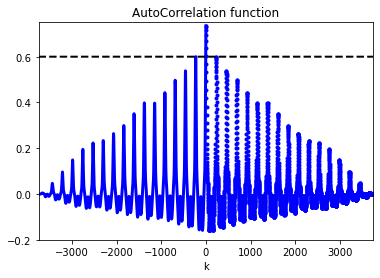

In [ ]:
dynamic_finding(data_ts, th = 0.6)

## Test train splitting 

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

## Modeling using vanilla recurrent neural network

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.SimpleRNN(10, input_shape = (1, 25), activation = 'tanh'))
model.add(keras.layers.Dense(1, activation = 'linear'))
model.compile(optimizer = 'adam', metrics = 'mse', loss = 'mse')
model.fit(np.expand_dims(x_train, axis = 1), y_train, epochs = 100, validation_data = (np.expand_dims(x_test, axis = 1),  y_test), batch_size = 5)

Epoch 1/100
521/521 [==============================] - 1s 1ms/step - loss: 0.0182 - mse: 0.0182 - val_loss: 0.0049 - val_mse: 0.0049
Epoch 2/100
521/521 [==============================] - 1s 1ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 0.0021 - val_mse: 0.0021
Epoch 3/100
521/521 [==============================] - 1s 1ms/step - loss: 0.0018 - mse: 0.0018 - val_loss: 0.0014 - val_mse: 0.0014
Epoch 4/100
521/521 [==============================] - 1s 1ms/step - loss: 0.0015 - mse: 0.0015 - val_loss: 0.0016 - val_mse: 0.0016
Epoch 5/100
521/521 [==============================] - 1s 1ms/step - loss: 0.0014 - mse: 0.0014 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 6/100
521/521 [==============================] - 1s 1ms/step - loss: 0.0012 - mse: 0.0012 - val_loss: 9.5550e-04 - val_mse: 9.5550e-04
Epoch 7/100
521/521 [==============================] - 1s 1ms/step - loss: 0.0011 - mse: 0.0011 - val_loss: 0.0014 - val_mse: 0.0014
Epoch 8/100
521/521 [==============================] - 1s 1ms

521/521 [==============================] - 1s 1ms/step - loss: 3.8389e-04 - mse: 3.8389e-04 - val_loss: 2.9948e-04 - val_mse: 2.9948e-04
Epoch 57/100
521/521 [==============================] - 1s 1ms/step - loss: 3.6850e-04 - mse: 3.6850e-04 - val_loss: 4.6589e-04 - val_mse: 4.6589e-04
Epoch 58/100
521/521 [==============================] - 1s 1ms/step - loss: 3.6453e-04 - mse: 3.6453e-04 - val_loss: 2.6169e-04 - val_mse: 2.6169e-04
Epoch 59/100
521/521 [==============================] - 1s 1ms/step - loss: 3.9354e-04 - mse: 3.9354e-04 - val_loss: 2.3075e-04 - val_mse: 2.3075e-04
Epoch 60/100
521/521 [==============================] - 1s 1ms/step - loss: 3.8460e-04 - mse: 3.8460e-04 - val_loss: 3.0857e-04 - val_mse: 3.0857e-04
Epoch 61/100
521/521 [==============================] - 1s 1ms/step - loss: 3.5798e-04 - mse: 3.5798e-04 - val_loss: 4.2236e-04 - val_mse: 4.2236e-04
Epoch 62/100
521/521 [==============================] - 1s 1ms/step - loss: 3.8685e-04 - mse: 3.8685e-04 - val_lo

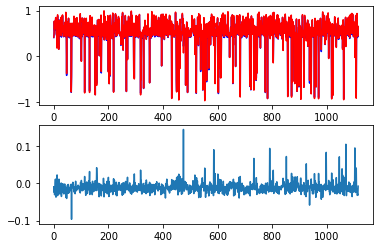

-0.01048823148573391 0.01563504255919639


In [ ]:
y_pre_te = model.predict(np.expand_dims(x_test, axis = 1))
plt.subplot(211)
plt.plot(y_pre_te, 'b-')
plt.plot(y_test, 'r-')
plt.subplot(212)
plt.plot(y_pre_te - y_test)
plt.show()
error = y_pre_te - y_test
print(np.mean(error), np.std(error))

## Modeling with MLP

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(10, input_shape = (1, 25), activation = 'tanh', name = 'first_layer'))
model.add(keras.layers.Dense(1, activation = 'linear', name = 'output'))
model.compile(optimizer = 'adam', metrics = 'mse', loss = 'mse')
model.fit(np.expand_dims(x_train, axis = 1), y_train, epochs = 100, validation_data = (np.expand_dims(x_test, axis = 1), y_test), batch_size = 5)

Epoch 1/100
521/521 [==============================] - 1s 1ms/step - loss: 0.0448 - mse: 0.0448 - val_loss: 0.0070 - val_mse: 0.0070
Epoch 2/100
521/521 [==============================] - 0s 946us/step - loss: 0.0054 - mse: 0.0054 - val_loss: 0.0037 - val_mse: 0.0037
Epoch 3/100
521/521 [==============================] - 0s 904us/step - loss: 0.0035 - mse: 0.0035 - val_loss: 0.0030 - val_mse: 0.0030
Epoch 4/100
521/521 [==============================] - 0s 916us/step - loss: 0.0025 - mse: 0.0025 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 5/100
521/521 [==============================] - 0s 939us/step - loss: 0.0018 - mse: 0.0018 - val_loss: 0.0014 - val_mse: 0.0014
Epoch 6/100
521/521 [==============================] - 0s 959us/step - loss: 0.0015 - mse: 0.0015 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 7/100
521/521 [==============================] - 1s 1ms/step - loss: 0.0012 - mse: 0.0012 - val_loss: 8.5569e-04 - val_mse: 8.5569e-04
Epoch 8/100
521/521 [==============================

521/521 [==============================] - 0s 893us/step - loss: 5.1268e-04 - mse: 5.1268e-04 - val_loss: 7.1487e-04 - val_mse: 7.1487e-04
Epoch 57/100
521/521 [==============================] - 0s 949us/step - loss: 4.3383e-04 - mse: 4.3383e-04 - val_loss: 2.5413e-04 - val_mse: 2.5413e-04
Epoch 58/100
521/521 [==============================] - 0s 878us/step - loss: 4.4600e-04 - mse: 4.4600e-04 - val_loss: 2.6337e-04 - val_mse: 2.6337e-04
Epoch 59/100
521/521 [==============================] - 0s 946us/step - loss: 4.3813e-04 - mse: 4.3813e-04 - val_loss: 2.5324e-04 - val_mse: 2.5324e-04
Epoch 60/100
521/521 [==============================] - 0s 857us/step - loss: 4.3061e-04 - mse: 4.3061e-04 - val_loss: 2.6478e-04 - val_mse: 2.6478e-04
Epoch 61/100
521/521 [==============================] - 0s 884us/step - loss: 4.4567e-04 - mse: 4.4567e-04 - val_loss: 2.8946e-04 - val_mse: 2.8946e-04
Epoch 62/100
521/521 [==============================] - 0s 872us/step - loss: 4.3435e-04 - mse: 4.343

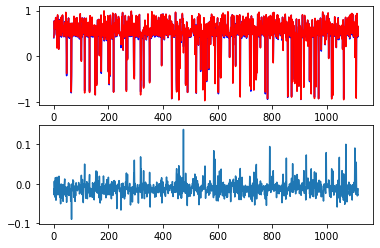

-0.010553125128100912 0.01872370134269064


In [ ]:
y_pre_te = model.predict(np.expand_dims(x_test, axis = 1))
error = y_pre_te.reshape(1116, 1) - y_test
plt.subplot(211)
plt.plot(y_pre_te.reshape(1116, 1), 'b-')
plt.plot(y_test, 'r-')
plt.subplot(212)
plt.plot(error)
plt.show()
print(np.mean(error), np.std(error))

## Modeling with LSTM

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.LSTM(10, input_shape = (1, 25), activation = 'tanh'))
model.add(keras.layers.Dense(1, activation = 'linear'))
model.compile(optimizer = 'adam', metrics = 'mse', loss = 'mse')
model.fit(np.expand_dims(x_train, axis = 1), y_train, epochs = 100, validation_data = (np.expand_dims(x_test, axis = 1),  y_test), batch_size = 5)

Epoch 1/100
521/521 [==============================] - 2s 2ms/step - loss: 0.0396 - mse: 0.0396 - val_loss: 0.0062 - val_mse: 0.0062
Epoch 2/100
521/521 [==============================] - 1s 2ms/step - loss: 0.0047 - mse: 0.0047 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 3/100
521/521 [==============================] - 1s 2ms/step - loss: 0.0025 - mse: 0.0025 - val_loss: 0.0018 - val_mse: 0.0018
Epoch 4/100
521/521 [==============================] - 1s 2ms/step - loss: 0.0018 - mse: 0.0018 - val_loss: 0.0017 - val_mse: 0.0017
Epoch 5/100
521/521 [==============================] - 1s 2ms/step - loss: 0.0015 - mse: 0.0015 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 6/100
521/521 [==============================] - 1s 2ms/step - loss: 0.0012 - mse: 0.0012 - val_loss: 9.8990e-04 - val_mse: 9.8990e-04
Epoch 7/100
521/521 [==============================] - 1s 2ms/step - loss: 0.0011 - mse: 0.0011 - val_loss: 8.4702e-04 - val_mse: 8.4702e-04
Epoch 8/100
521/521 [==============================] 

521/521 [==============================] - 1s 2ms/step - loss: 3.9569e-04 - mse: 3.9569e-04 - val_loss: 3.1232e-04 - val_mse: 3.1232e-04
Epoch 57/100
521/521 [==============================] - 1s 2ms/step - loss: 3.8213e-04 - mse: 3.8213e-04 - val_loss: 6.7160e-04 - val_mse: 6.7160e-04
Epoch 58/100
521/521 [==============================] - 1s 2ms/step - loss: 3.8518e-04 - mse: 3.8518e-04 - val_loss: 2.7368e-04 - val_mse: 2.7368e-04
Epoch 59/100
521/521 [==============================] - 1s 2ms/step - loss: 3.8461e-04 - mse: 3.8461e-04 - val_loss: 3.7462e-04 - val_mse: 3.7462e-04 - loss: 4.0470e-04 - mse: 4.0470e
Epoch 60/100
521/521 [==============================] - 1s 2ms/step - loss: 3.8875e-04 - mse: 3.8875e-04 - val_loss: 2.5173e-04 - val_mse: 2.5173e-04
Epoch 61/100
521/521 [==============================] - 1s 2ms/step - loss: 3.9574e-04 - mse: 3.9574e-04 - val_loss: 2.4678e-04 - val_mse: 2.4678e-04
Epoch 62/100
521/521 [==============================] - 1s 2ms/step - loss: 3.6

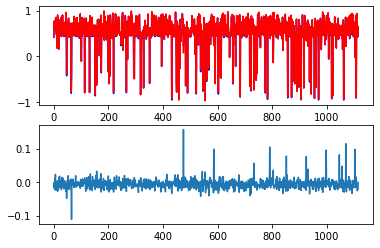

-0.005290571356123128 0.015187181547692788


In [ ]:
y_pre_te = model.predict(np.expand_dims(x_test, axis = 1))
error = y_pre_te.reshape(1116, 1) - y_test
plt.subplot(211)
plt.plot(y_pre_te.reshape(1116, 1), 'b-')
plt.plot(y_test, 'r-')
plt.subplot(212)
plt.plot(error)
plt.show()
print(np.mean(error), np.std(error))